In [48]:
# 导入项目中所需的模块包
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [49]:
df = pd.read_csv("ratings_Electronics.csv", names=['userID', 'productID', 'Rating', 'timestamp'])

In [50]:
# 查看数据
df.head()

,userID,productID,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [51]:
# 查看数据类型
print('数据类型：')
print(df.dtypes,'\n')
print('数据大致信息：')
print(df.info())

数据类型：
userID        object
productID     object
Rating       float64
timestamp      int64
dtype: object 

数据大致信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userID     object 
 1   productID  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB
None


### 查看用户对商品的评分数据

In [52]:
df.describe()

,Rating,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [53]:
# 输出最低、最高评分
print('最低评分：%d 分' %(df.Rating.min()))
print('最高评分：%d 分' %(df.Rating.max()))

最低评分：1 分
最高评分：5 分


In [54]:
print('数据统计：\n')

print('用户总数：',len(np.unique(df.userID)))
print('商品总数：',len(np.unique(df.productID)))
print('评分总数：',df.shape[0])

数据统计：

用户总数： 4201696
商品总数： 476002
评分总数： 7824482


### 查看各字段的缺失情况

In [55]:
print('各字段的缺失值数量情况')
print(df.isnull().sum())

各字段的缺失值数量情况
userID       0
productID    0
Rating       0
timestamp    0
dtype: int64


### 删除冗余数据

In [56]:
# 删除时间戳
df.drop(['timestamp'],axis=1, inplace=True)
print('删除后的结果')
df.head()

删除后的结果


,userID,productID,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


# 数据可视化
### 用户评分数

In [57]:
# 每个用户的评分数，降序排序

user_rate_nums = df.groupby(by='userID')['Rating'].count().sort_values(ascending=False)
user_rate_nums.head()

userID
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Rating, dtype: int64

In [58]:
user_rate_nums.describe()

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: Rating, dtype: float64

In [59]:
print('被50及以上人评分的商品数量有：{}个\n'.format(sum(user_rate_nums>=50)))

被50及以上人评分的商品数量有：1540个



### 商品评分数

D:\Software\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27599 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Software\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Software\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Software\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Software\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Software\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35780 missing from current font.
  fon

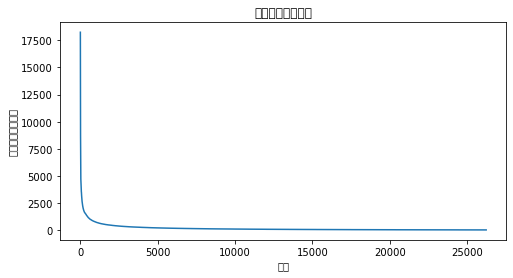

In [60]:
# 筛选出被评分次数超过 50 的商品
new_df = df.groupby('productID').filter(lambda x:x['Rating'].count()>=50)

# 每个商品被评分的次数，降序排序
product_rate_nums = new_df.groupby(by='productID')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize = plt.figaspect(.5))
plt.plot(product_rate_nums.values)
plt.title('每个商品的评分数')
plt.xlabel('商品')
plt.ylabel('每种商品的评分数')
plt.show()

### 商品平均分

In [61]:
# 每个商品的平均分，降序排序
new_df.groupby('productID')['Rating'].mean().sort_values(ascending=False).head()

productID
B002E6R7NG    4.980392
B004I763AW    4.966667
B003J9QQWU    4.964286
B0043ZLFXE    4.955556
B000TMFYBO    4.953125
Name: Rating, dtype: float64

In [62]:
# 每个商品的评分数量，降序排序
new_df.groupby('productID')['Rating'].count().sort_values(ascending=False).head()

productID
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: Rating, dtype: int64

In [63]:
# 平均分 与 评分数量
ratings_mean_count = pd.DataFrame(new_df.groupby('productID')['Rating'].mean().sort_values(ascending=False))
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productID')['Rating'].count())
ratings_mean_count.head()

,Rating,rating_counts
productID,,
B002E6R7NG,4.980392,51
B004I763AW,4.966667,60
B003J9QQWU,4.964286,56
B0043ZLFXE,4.955556,90
B000TMFYBO,4.953125,64


### 不同评分的用户数量分布

<AxesSubplot:>

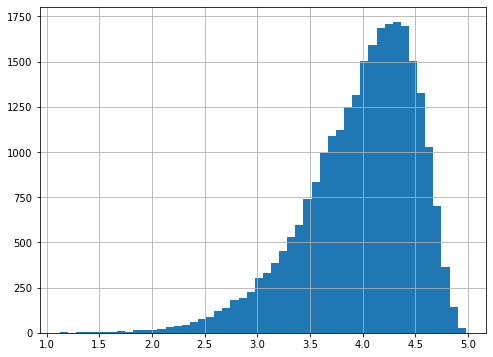

In [64]:
plt.figure(figsize=(8,6))
ratings_mean_count['Rating'].hist(bins=50)

# 利用基于矩阵分解的协同过滤算法实现商品退推荐系统
### 创建商品和用户的关系举证

In [67]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userID', columns='productID', fill_value=0)
print(ratings_matrix.head())    # 查看矩阵

productID              0972683275  1400501466  1400501520  1400501776  \
userID                                                                  
A01852072Z7B68UHLI5UG           0           0           0           0   
A0266076X6KPZ6CCHGVS            0           0           0           0   
A0293130VTX2ZXA70JQS            5           0           0           0   
A030530627MK66BD8V4LN           4           0           0           0   
A0571176384K8RBNKGF8O           0           0           0           0   

productID              1400532620  1400532655  140053271X  1400532736  \
userID                                                                  
A01852072Z7B68UHLI5UG           0           0           0           0   
A0266076X6KPZ6CCHGVS            0           0           0           0   
A0293130VTX2ZXA70JQS            0           0           0           0   
A030530627MK66BD8V4LN           0           0           0           0   
A0571176384K8RBNKGF8O           0           0     

In [68]:
X = ratings_matrix.T    # 矩阵转置
print(X.head())         # 查看转置后的矩阵

userID      A01852072Z7B68UHLI5UG  A0266076X6KPZ6CCHGVS  A0293130VTX2ZXA70JQS  \
productID                                                                       
0972683275                      0                     0                     5   
1400501466                      0                     0                     0   
1400501520                      0                     0                     0   
1400501776                      0                     0                     0   
1400532620                      0                     0                     0   

userID      A030530627MK66BD8V4LN  A0571176384K8RBNKGF8O  \
productID                                                  
0972683275                      4                      0   
1400501466                      0                      0   
1400501520                      0                      0   
1400501776                      0                      0   
1400532620                      0                      0   

userID     

### 分解矩阵

构建 SVD 模型，将特征数目组合为 10 个重要特征

In [69]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)    #对矩阵进行转化
pd.DataFrame(decomposed_matrix)             #查看转化后的矩阵

,0,1,2,3,4,5,6,7,8,9
0,1.481045e+02,-0.154596,0.024543,0.000151,-0.134140,0.000046,0.046183,-0.000118,0.001403,-0.084793
1,6.744942e-04,1.283323,1.480263,0.197338,0.000622,-0.001842,0.005002,-0.017555,61.435785,-0.037695
2,5.219793e-05,0.098017,0.313583,0.005702,0.005334,-0.009651,0.030832,0.023626,1.541070,-0.352615
3,5.227560e-04,0.754430,0.519839,0.028574,0.014244,-0.063550,0.034670,-0.276025,3.762409,-0.106569
4,4.176111e-04,0.796014,1.071283,-0.010213,0.016290,0.099669,0.057787,0.018992,0.324709,-1.227223
...,...,...,...,...,...,...,...,...,...,...
71,9.845802e-07,0.000031,-0.000109,0.000021,-0.000154,0.000927,-0.000328,0.000605,0.000759,0.014208
72,-3.854022e-05,-0.011602,0.011094,-0.013239,0.323775,0.096299,1.063266,-0.017927,-0.311094,-1.296361
73,1.808079e-04,0.002219,0.000194,0.000501,0.001470,0.000631,0.002194,0.012294,0.035888,-0.018235
74,9.651395e-06,-0.001024,-0.000777,-0.000059,-0.004206,0.001915,0.001112,0.009247,-0.063084,0.256885


**构建相关系数矩阵，计算商品间的相关系数**

In [70]:
correlation_matrix = np.corrcoef(decomposed_matrix)
print(pd.DataFrame(correlation_matrix))

          0         1         2         3         4         5         6   \
0   1.000000 -0.116671 -0.113828 -0.136679 -0.066424 -0.087238 -0.128299   
1  -0.116671  1.000000  0.954889  0.973420  0.144950 -0.085613 -0.120860   
2  -0.113828  0.954889  1.000000  0.964503  0.418905 -0.070027  0.080440   
3  -0.136679  0.973420  0.964503  1.000000  0.302119  0.070467  0.015842   
4  -0.066424  0.144950  0.418905  0.302119  1.000000  0.295182  0.624307   
..       ...       ...       ...       ...       ...       ...       ...   
71 -0.126256 -0.073284 -0.319564 -0.133044 -0.787511 -0.098039 -0.154733   
72  0.009887 -0.179127  0.014659 -0.147756  0.504452  0.001132  0.019002   
73 -0.091923  0.836729  0.906821  0.809716  0.438206 -0.031328 -0.111262   
74 -0.082379 -0.347084 -0.562804 -0.391919 -0.773818 -0.067121 -0.094867   
75  0.009805 -0.723260 -0.855985 -0.733479 -0.619402 -0.015983  0.018223   

          7         8         9   ...        66        67        68        69  \
0  -0.

### 基于物品相似度实现推荐
**确定商品的唯一性**

In [71]:
i = X.index[20]    # 假设用户喜欢第 20 个商品
product_names = list(X.index)
product_ID = product_names.index(i)
print(product_ID)

20


**查看该商品在相似度矩阵中相似的商品**

In [74]:
correlation_product_ID = correlation_matrix[product_ID]
print(correlation_product_ID.shape[0])    # 相似商品数量

76


In [75]:
# 选出相关系数大于 0.8 的商品
Recommend = list(X.index[correlation_product_ID > 0.8])
# 去除商品自身
Recommend.remove(i)
# 将相关系数排名前 5 的商品推荐给喜欢该商品的用户
pd.DataFrame(Recommend[0:5])    # 最终展示

,0
0,3744295508
1,8862935293
2,9625993428
3,B00000J05A
4,B00000J1EP
